# Train with video and images

In [1]:
import torch
torch.cuda.set_device(5)

from experiment.experiment import Experiment2
from utils.spatial_utils import PerceptualLoss, SpatialMapsGenerator, BatchGenerator
from models.gram_and_learn import GramAndImages, GramAndImagesTest, loss
from models.skip import skip
from utils.common_utils import (generateSyntheticTexture,
                               generateSyntheticData,
                               preprocessTarget,
                               numpyToVar, generateSyntheticImage)

from skimage.transform import resize
import torch
dtype = torch.cuda.FloatTensor
from IPython.core.display import display, HTML
from models.decoder import decoder
from utils.decoder_utils import SpatialVectorGenerator, MultipleVectorGenerator
from torch.utils import data
import numpy as np

In [2]:
config = {
    "PLOT": True,
    "optimizer": "adam",
    "lr": 1e-4,
    "num_iter": 20000,
    "show_every": 100,
    "maps_number": 4,
    "pic_code_size": 300,
    "time_code_size": 4,
    "output_size": 128,
    "video_length": 64,
    "examples": 30,
    "batch_size": 2,
    "reg_noise": 0.01
}

config['net_params'] = {'num_input_channels': config['maps_number'] + 3,
               'num_channels_down': [4, 8, 16, 32],
               'num_channels_up': [4, 8, 16, 32],
               'num_channels_skip': [0, 0, 0, 0]}

In [3]:
train_loader = GramAndImages(config['video_length'], config['maps_number'], config['output_size'])

In [4]:
train_batch_gen = torch.utils.data.DataLoader(train_loader, 
                                              batch_size=config['batch_size'],
                                              num_workers=1, collate_fn=lambda x: (torch.cat([y[0] for y in x]), torch.cat([y[1] for y in x])))

In [5]:
net = skip(**config["net_params"])
net = net.cuda()

parameters = list(net.parameters())
for value in train_loader.maps_generator_.spatial_variables.values():
    parameters.append(value)


train_with_video = Experiment2(config, parameters, train_batch_gen, net, loss)

Starting optimization with ADAM


/home/aafilatov/Images2Life/experiment/experiment.py:38: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  (i, total_loss.data[0]), '\r', end='')


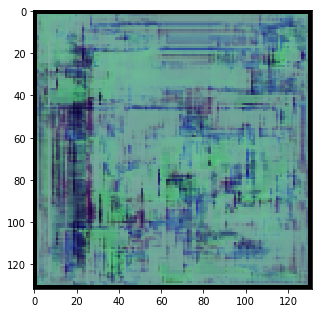

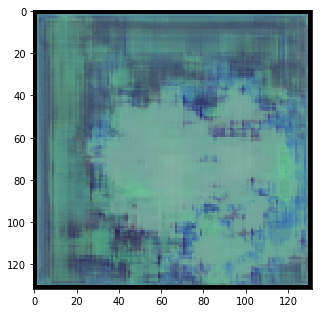

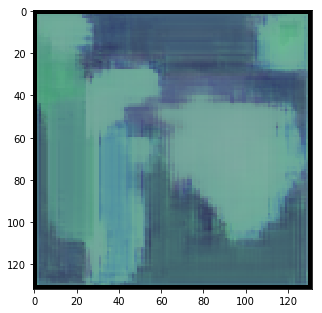

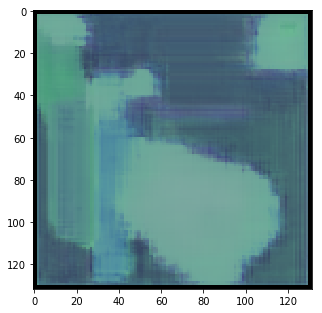

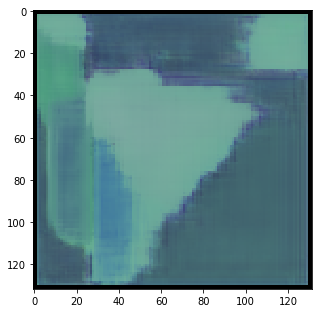

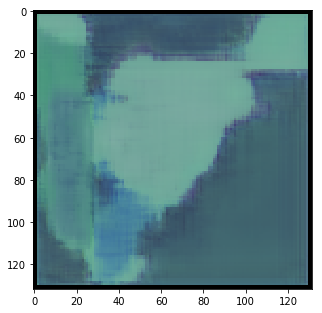

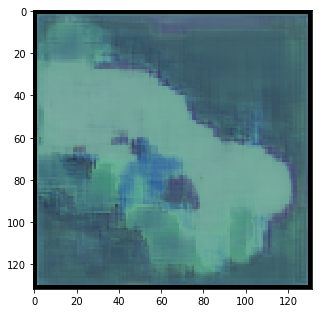

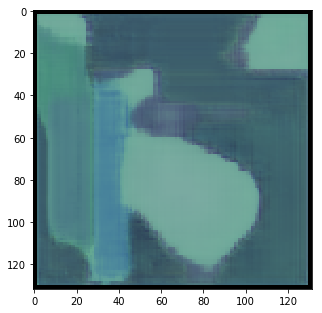

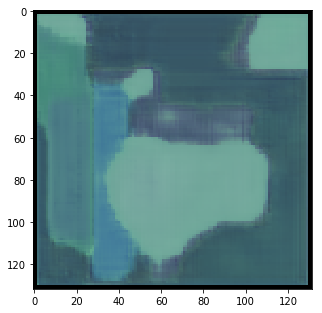

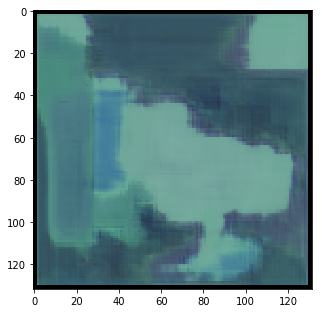

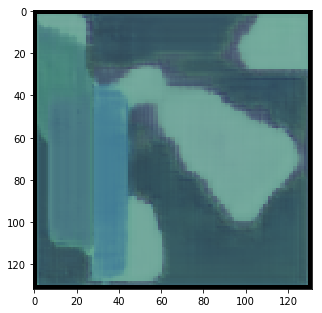

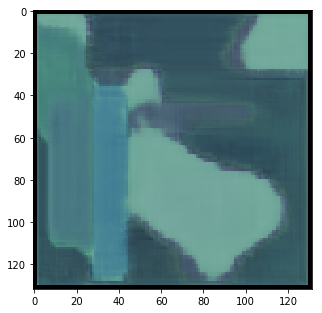

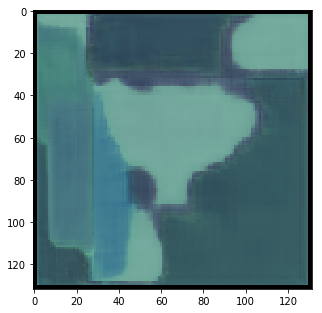

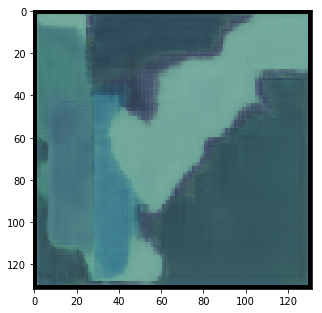

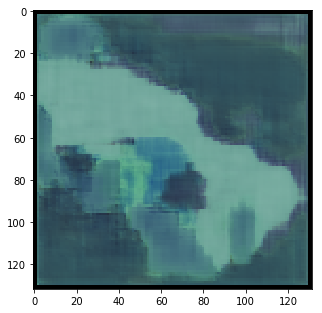

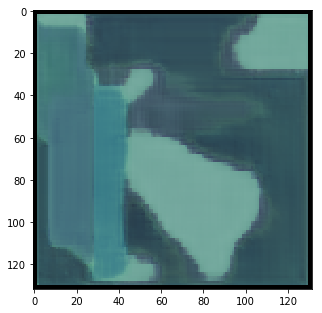

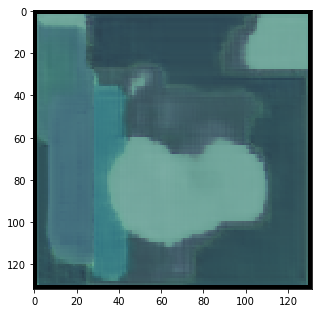

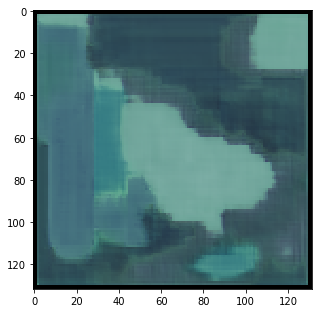

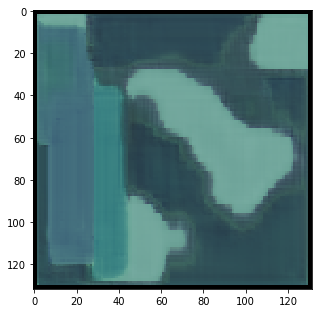

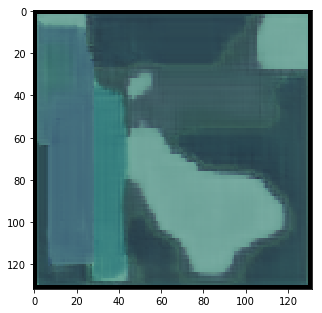

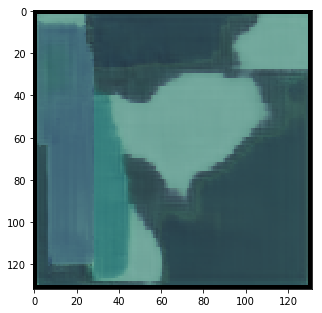

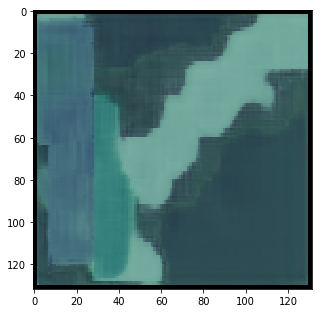

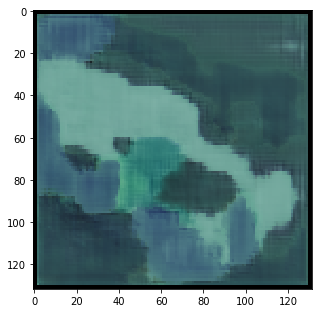

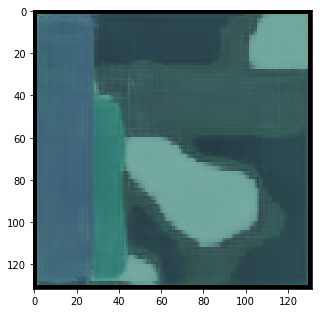

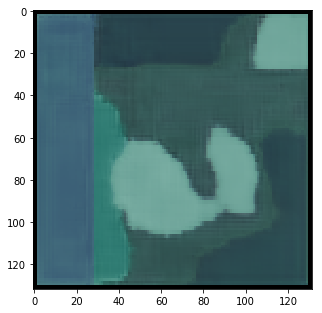

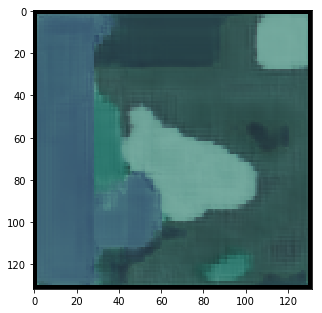

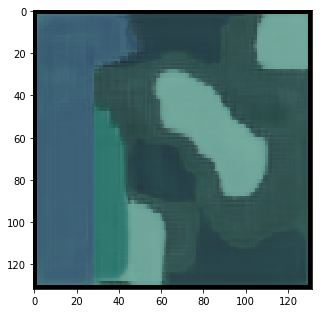

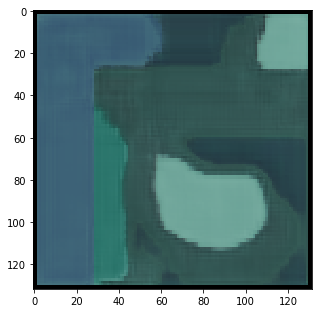

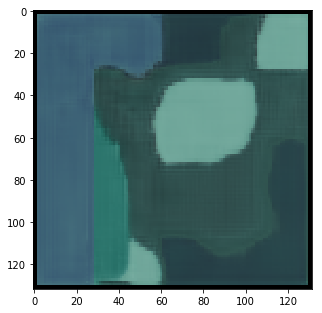

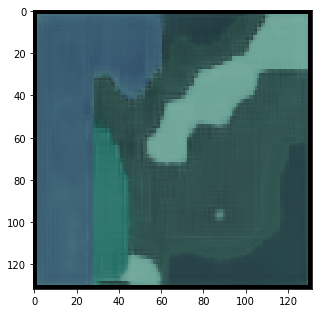

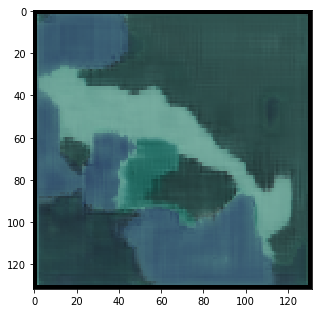

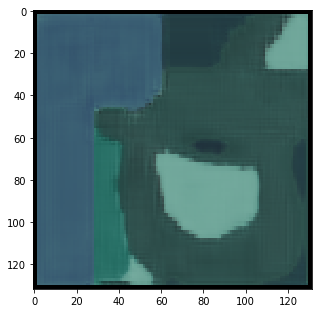

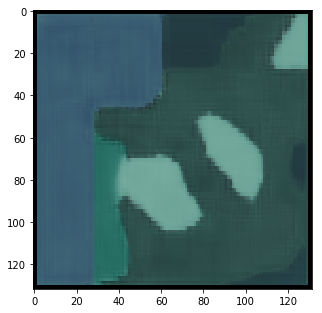

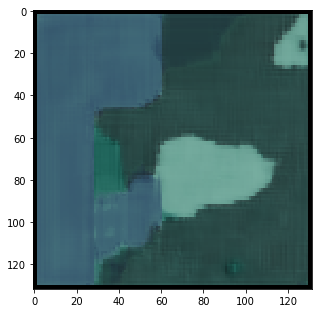

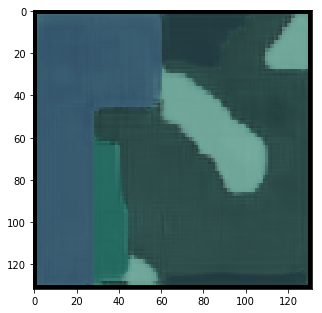

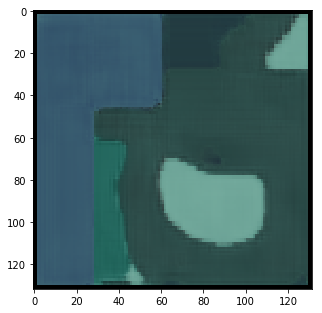

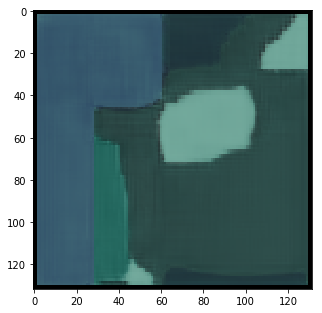

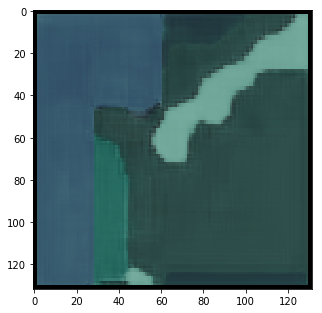

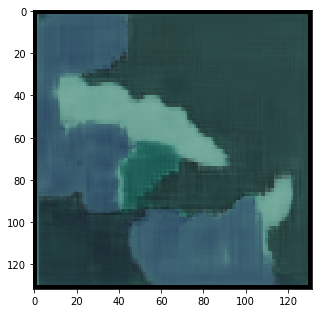

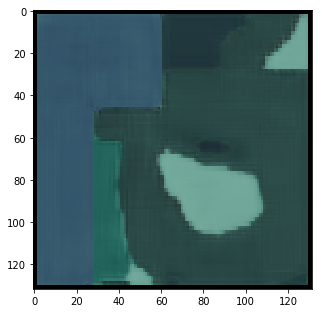

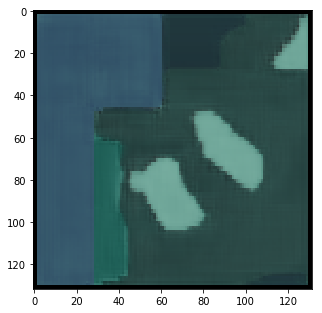

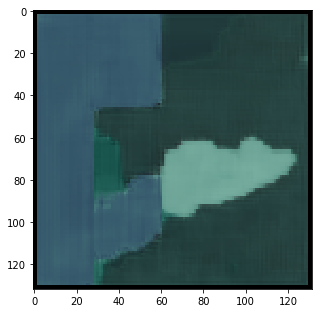

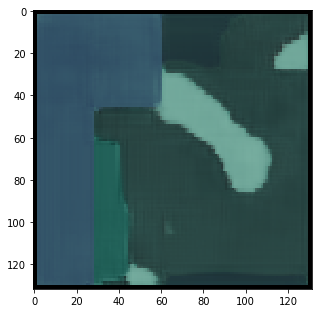

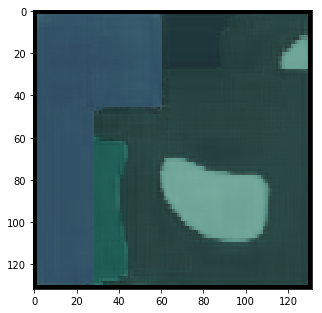

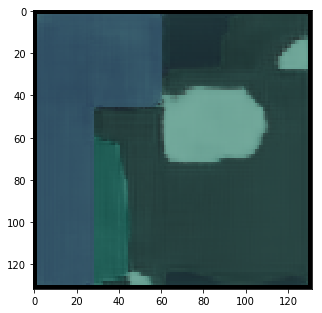

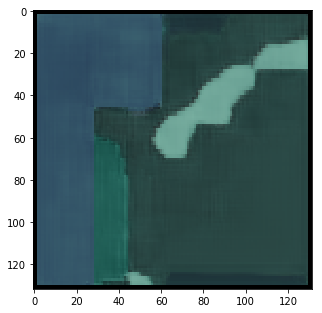

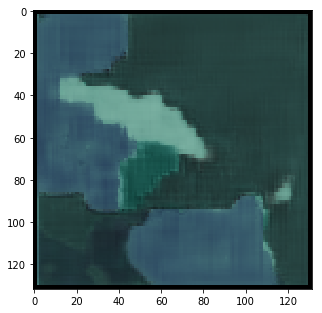

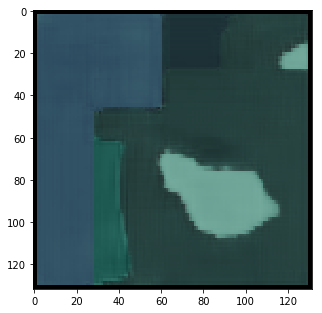

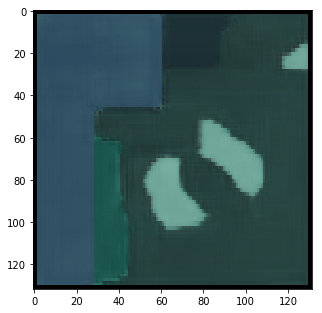

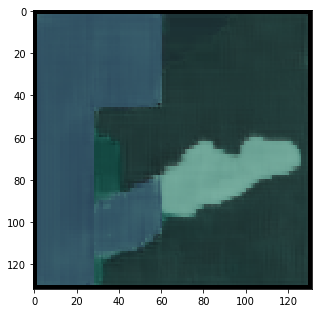

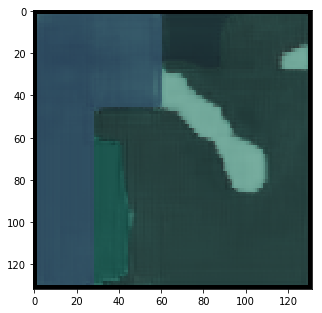

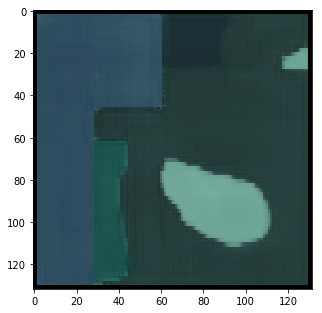

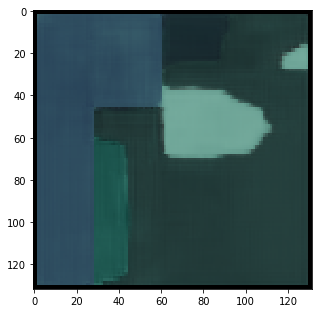

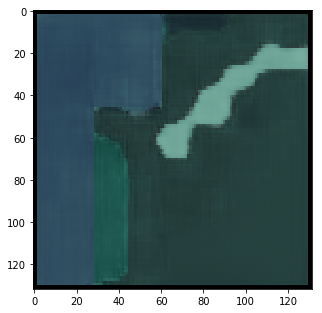

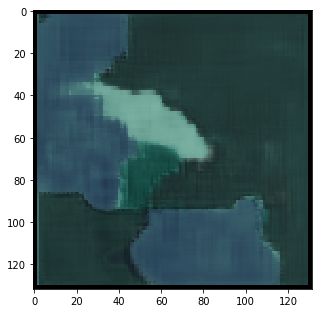

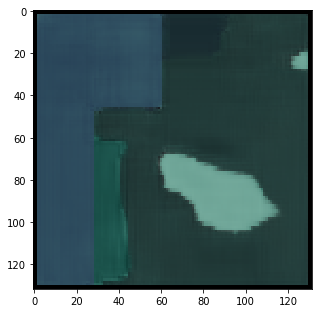

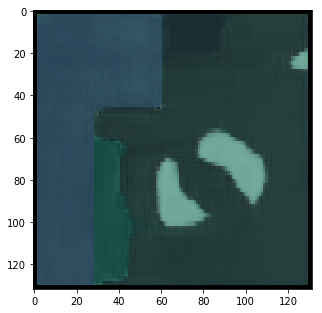

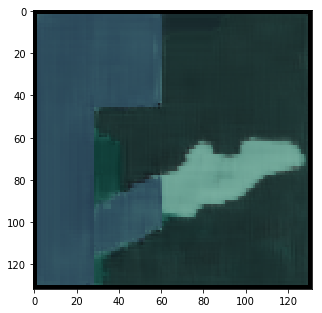

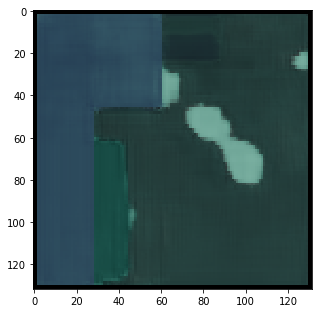

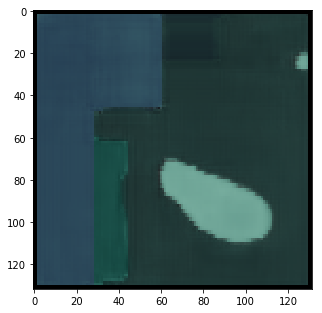

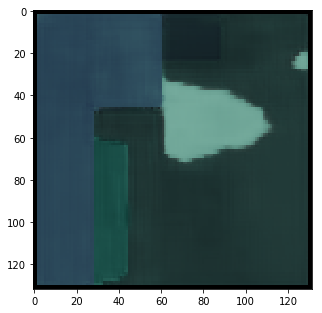

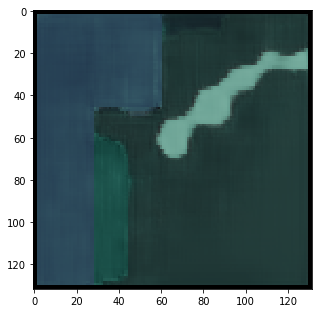

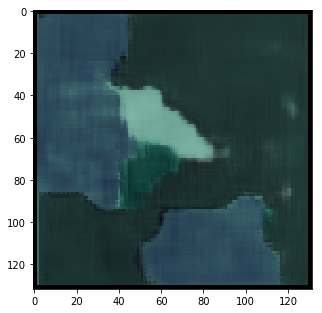

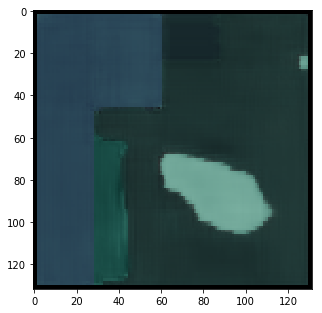

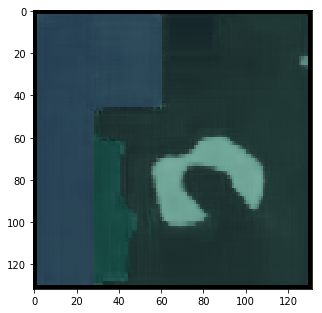

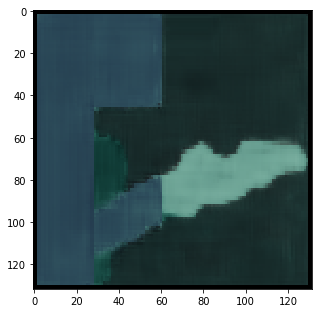

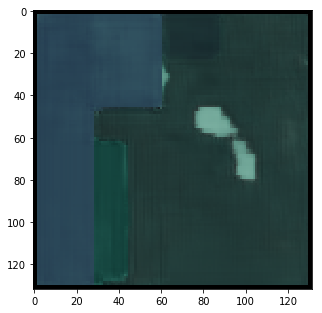

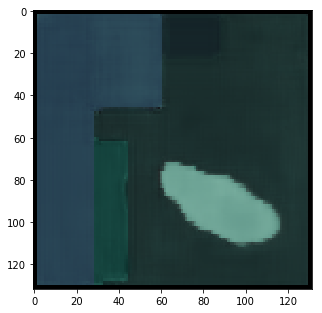

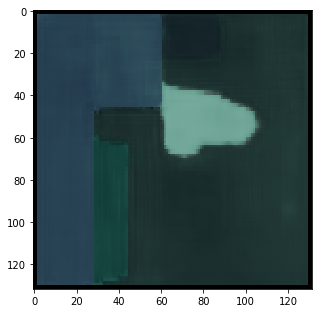

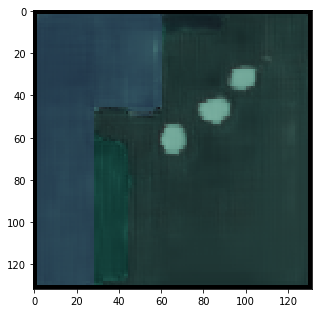

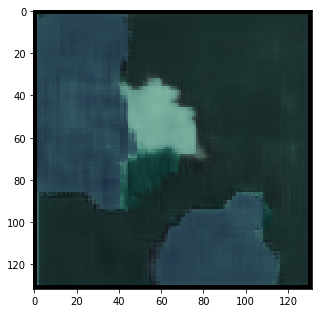

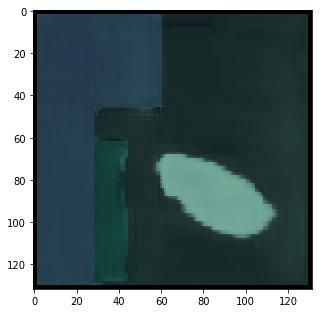

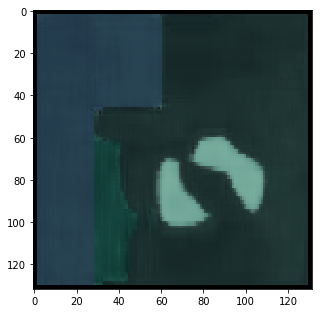

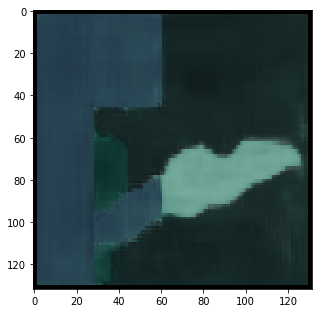

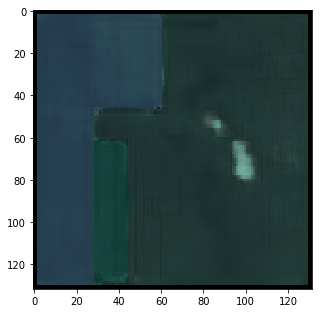

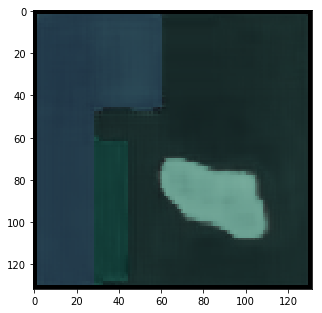

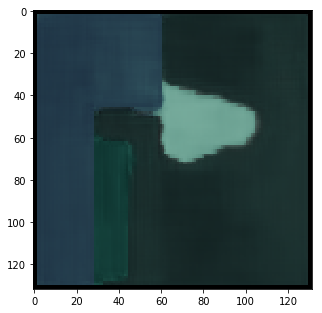

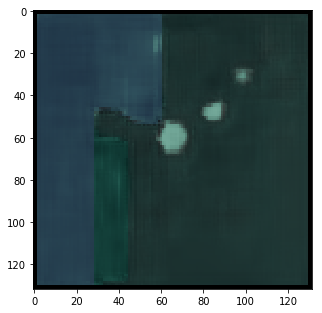

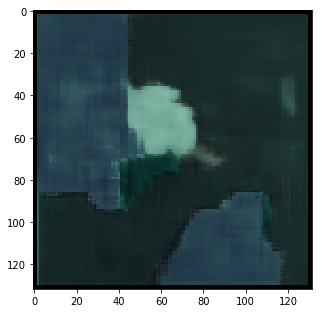

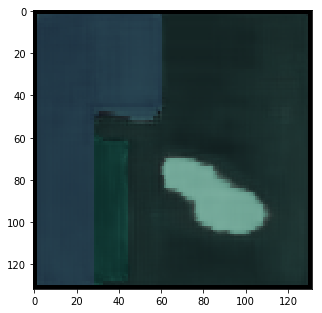

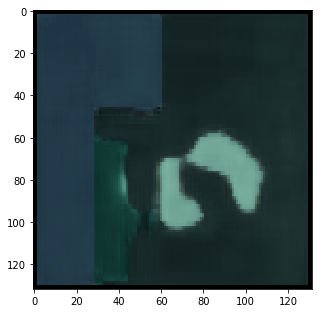

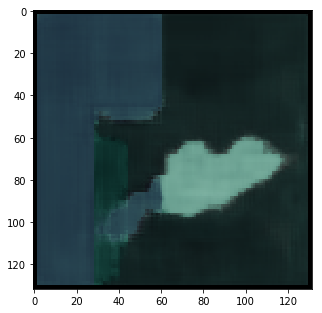

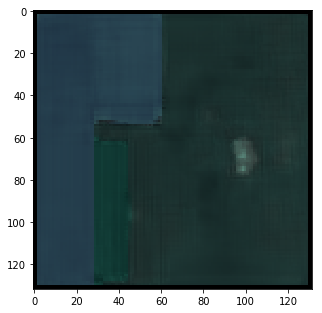

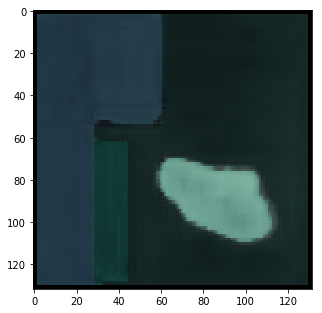

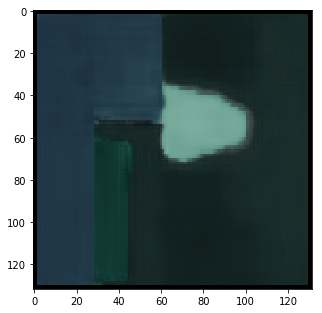

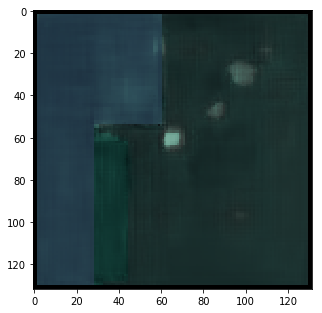

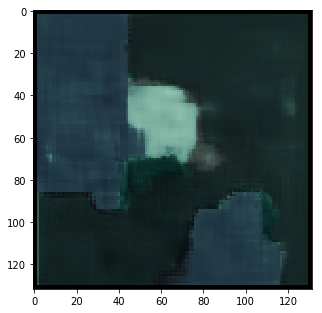

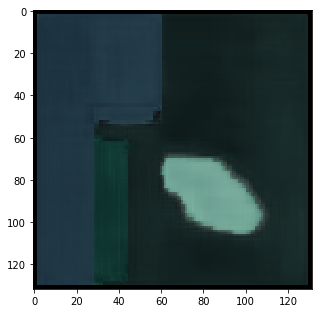

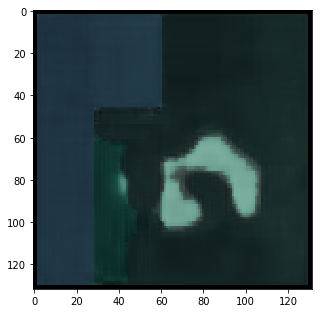

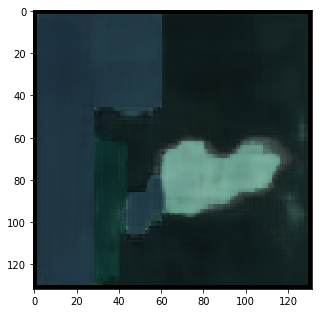

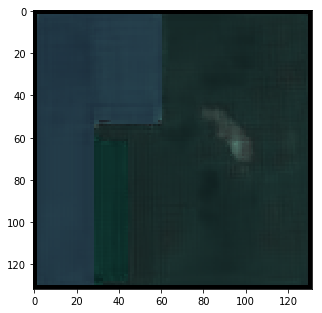

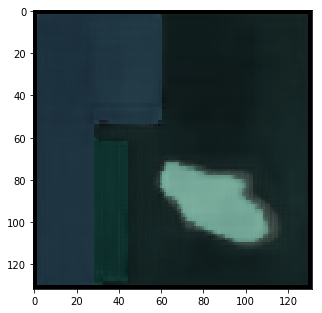

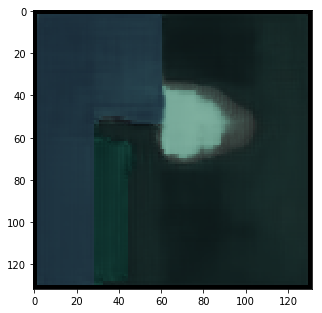

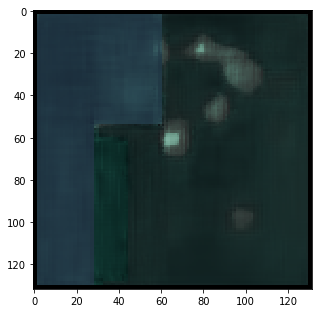

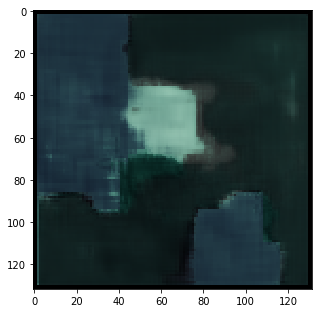

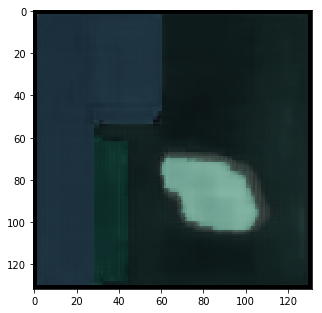

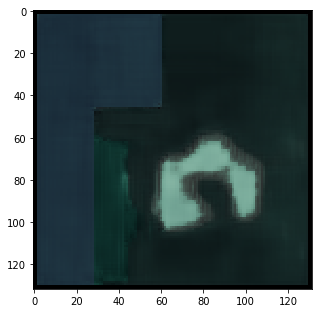

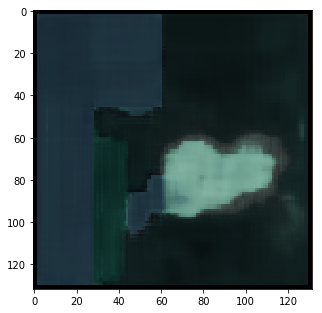

Process Process-305:
Traceback (most recent call last):
  File "/home/aafilatov/Images2Life/experiment/experiment.py", line 26, in closure
    X, Y = next(iterator)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 275, in __next__
    raise StopIteration
StopIteration

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 57, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/aafilatov/Images2Life/models/gr

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-e2a686b3ba07>", line 1, in <module>
    train_with_video.run()
  File "/home/aafilatov/Images2Life/experiment/experiment.py", line 46, in run
    closure, self.config_["lr"], self.config_["num_iter"])
  File "/home/aafilatov/Images2Life/utils/common_utils.py", line 244, in optimize
    optimizer.step()
  File "/usr/local/lib/python3.5/dist-packages/torch/optim/adam.py", line 93, in step
    exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_

KeyboardInterrupt: 

In [6]:
train_with_video.run()

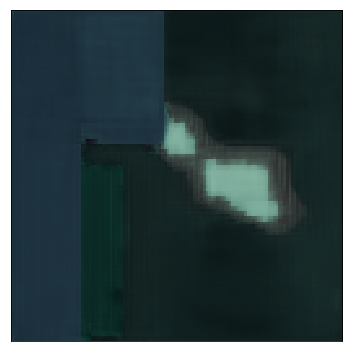

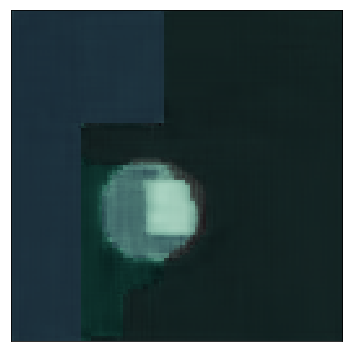

In [7]:
test_generator = GramAndImagesTest(config['video_length'], 101, config['maps_number'], config['output_size'], 
                                  train_loader.maps_generator_)

train_generator = GramAndImagesTest(config['video_length'], 10, config['maps_number'], config['output_size'], 
                                  train_loader.maps_generator_, train_loader.video_[:1])

train_with_video.save_result(test_generator, train_generator);

In [8]:
from IPython.core.display import display, HTML
display(HTML(''' <video width="320" height="240" controls loop>
  <source src='{}' type="video/mp4">
</video>
<video width="320" height="240" controls loop>
  <source src='{}' type="video/mp4">
</video>
<video width="320" height="240" controls loop>
  <source src='{}' type="video/mp4">
</video> '''.format(train_with_video.path_ +"/fit.mp4",
                    train_with_video.path_ +"/predict.mp4",
                    train_with_video.path_ +"/target.mp4")))